In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import quandl
import numpy as np
from matplotlib import gridspec 
from sklearn.cluster import OPTICS, cluster_optics_dbscan 
from sklearn.preprocessing import normalize, StandardScaler 
from math import sqrt

In [6]:
data_frame = pd.read_csv("../one_year_data.csv")
data_frame = data_frame.iloc[:, 1:492]

In [7]:
data = np.where(np.isnan(data_frame), 0, data_frame)

In [9]:
# Scaling the data to bring all the attributes to a comparable level 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(data) 
  
# Normalizing the data so that the data 
# approximately follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X = pd.DataFrame(X_normalized) 
  
# Renaming the columns 
#X.columns = data.columns 
  
X.head() 

,0,1,2,3,4,5,6,7,8,9,...,481,482,483,484,485,486,487,488,489,490
0,-0.000558,-0.053197,-0.032632,-0.046186,-0.034563,-0.075631,-0.061664,-0.023115,0.062955,0.023625,...,0.036458,-0.050059,-0.070451,-0.052588,-0.042677,-0.031034,-0.033418,-0.045242,-0.062613,-0.008688
1,-0.000407,-0.052638,-0.030983,-0.042622,-0.034593,-0.074567,-0.062115,-0.023683,0.066370,0.019179,...,0.035502,-0.047334,-0.067227,-0.052179,-0.042858,-0.034426,-0.030547,-0.045135,-0.060033,-0.002744
2,-0.000785,-0.050978,-0.029872,-0.044250,-0.040013,-0.072765,-0.059715,-0.028715,0.066715,0.011728,...,0.042860,-0.044550,-0.065687,-0.052577,-0.043286,-0.039062,-0.033092,-0.044360,-0.057565,-0.009869
3,-0.000476,-0.045465,-0.030513,-0.044409,-0.036999,-0.074591,-0.057137,-0.027296,0.065178,0.033254,...,0.056840,-0.043391,-0.065428,-0.052637,-0.044676,-0.032914,-0.035666,-0.041193,-0.058865,-0.007233
4,-0.001081,-0.045785,-0.029352,-0.042052,-0.040982,-0.075587,-0.056776,-0.022889,0.065142,0.018251,...,0.047562,-0.045528,-0.064949,-0.058770,-0.044884,-0.032902,-0.036804,-0.040273,-0.049823,-0.012064


In [11]:
# Building the OPTICS Clustering model 
optics_model = OPTICS(min_samples = 10, xi = 0.05, min_cluster_size = 0.05) 
  
# Training the model 
optics_model.fit(X) 

OPTICS(algorithm='auto', cluster_method='xi', eps=None, leaf_size=30,
       max_eps=inf, metric='minkowski', metric_params=None,
       min_cluster_size=0.05, min_samples=10, n_jobs=None, p=2,
       predecessor_correction=True, xi=0.05)

In [12]:
# Producing the labels according to the DBSCAN technique with eps = 0.5 
labels1 = cluster_optics_dbscan(reachability = optics_model.reachability_, 
                                   core_distances = optics_model.core_distances_, 
                                   ordering = optics_model.ordering_, eps = 0.5) 
  
# Producing the labels according to the DBSCAN technique with eps = 2.0 
labels2 = cluster_optics_dbscan(reachability = optics_model.reachability_, 
                                   core_distances = optics_model.core_distances_, 
                                   ordering = optics_model.ordering_, eps = 2) 
  
# Creating a numpy array with numbers at equal spaces till 
# the specified range 
space = np.arange(len(X)) 
  
# Storing the reachability distance of each point 
reachability = optics_model.reachability_[optics_model.ordering_] 
  
# Storing the cluster labels of each point 
labels = optics_model.labels_[optics_model.ordering_] 
  
print(labels) 

[-1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  2  2  2  2  2  2  2  2  2  2  2  2 -1 -1 -1 -1 -1 -1  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3 -1
 -1 -1 -1 -1 -1 -1 -1 -1  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6 -1 -1 -1]


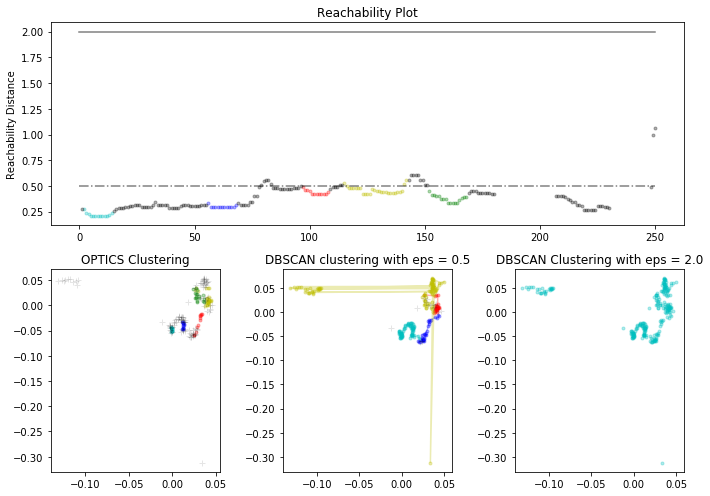

In [13]:
# Defining the framework of the visualization 
plt.figure(figsize =(10, 7)) 
G = gridspec.GridSpec(2, 3) 
ax1 = plt.subplot(G[0, :]) 
ax2 = plt.subplot(G[1, 0]) 
ax3 = plt.subplot(G[1, 1]) 
ax4 = plt.subplot(G[1, 2]) 
  
# Plotting the Reachability-Distance Plot 
colors = ['c.', 'b.', 'r.', 'y.', 'g.'] 
for Class, colour in zip(range(0, 5), colors): 
    Xk = space[labels == Class] 
    Rk = reachability[labels == Class] 
    ax1.plot(Xk, Rk, colour, alpha = 0.3) 
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha = 0.3) 
ax1.plot(space, np.full_like(space, 2., dtype = float), 'k-', alpha = 0.5) 
ax1.plot(space, np.full_like(space, 0.5, dtype = float), 'k-.', alpha = 0.5) 
ax1.set_ylabel('Reachability Distance') 
ax1.set_title('Reachability Plot') 
  
# Plotting the OPTICS Clustering 
colors = ['c.', 'b.', 'r.', 'y.', 'g.'] 
for Class, colour in zip(range(0, 5), colors): 
    Xk = X[optics_model.labels_ == Class] 
    ax2.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3) 
      
ax2.plot(X.iloc[optics_model.labels_ == -1, 0], 
        X.iloc[optics_model.labels_ == -1, 1], 
       'k+', alpha = 0.1) 
ax2.set_title('OPTICS Clustering') 
  
# Plotting the DBSCAN Clustering with eps = 0.5 
colors = ['c', 'b', 'r', 'y', 'g', 'greenyellow'] 
for Class, colour in zip(range(0, 6), colors): 
    Xk = X[labels1 == Class] 
    ax3.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3, marker ='.') 
        
ax3.plot(X.iloc[labels1 == -1, 0], 
        X.iloc[labels1 == -1, 1], 
       'k+', alpha = 0.1) 
ax3.set_title('DBSCAN clustering with eps = 0.5') 
  
# Plotting the DBSCAN Clustering with eps = 2.0 
colors = ['c.', 'y.', 'm.', 'g.'] 
for Class, colour in zip(range(0, 4), colors): 
    Xk = X.iloc[labels2 == Class] 
    ax4.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3) 
          
ax4.plot(X.iloc[labels2 == -1, 0], 
        X.iloc[labels2 == -1, 1], 
       'k+', alpha = 0.1) 
ax4.set_title('DBSCAN Clustering with eps = 2.0') 
  
  
plt.tight_layout() 
plt.show() 